# COMP1804 - Applied Machine Learning (Coursework)
*The coursework is about a consulting scenario for a non-profit organization known as *NotTheRealWikipedia*, to explore if ML can assist in analyzing new content on their site. It comprises two main tasks:*

1. **Topic Classification**: Utilizing ML to categorize paragraphs of text into one of five topics based on the content and the presence of references to a person, organization, and/or product. Success criteria include outperforming a trivial baseline, avoiding overfitting, and ensuring low misclassification rates for each class.
2. **Text Clarity Classification Prototype**: Developing a prototype to automatically assess if a paragraph is written clearly enough, employing a subset of the data for training. This task also requires addressing ethical implications and suggesting improvements based on the prototype's performance.

Here is the given dataset structure as follows,
| FEATURE NAME       | BRIEF DESCRIPTION                                                                          |
|--------------------|---------------------------------------------------------------------------------------------|
| `par_id`             | Unique identifier for each paragraph to classify.                                           |
| `paragraph`          | Text to classify.                                                                           |
| `has_entity`         | Whether the text contains a reference to a product (yes/no), an organisation (yes/no), or a person (yes/no). |
| `lexicon_count`      | The number of words in the text.                                                            |
| `difficult_words`    | The number of difficult words in the text.                                                  |
| `last_editor_gender` | The gender of the latest person to edit the text.                                           |
| `category`           | The category into which the text should be classified.                                      |
| `text_clarity`       | The clarity level of the text. Very few data points are labelled at first.                 |

### Setup a Python Environment

This is crucial for any  data science project. You can use Anaconda or Miniconda to create virtual environments.

**Usage**:
```bash
conda create --name COMP1804-AML python=3.10.10
conda activate COMP1804-AML
```



### Prerequisite Packages
Before proceeding with the actual code, it's crucial to ensure all necessary Python packages are installed. This is achieved by running a `pip install` command that references a [`requirements.txt`](../Docs/requirements.txt) file. This file must be located in a relative path from the notebook (`../Docs/requirements.txt`). The command `%pip install --user -r ../Docs/requirements.txt --quiet` takes care of installing these packages. The [`requirements.txt`](../Docs/requirements.txt) file contains necessary packages for running the Jupyter notebook.

**Usage**:
```python
%pip install --user -r ../Docs/requirements.txt --quiet
%run ../WordEmbeddings/download.py
```

After install the required packages, run the following command in the terminal.
```bash
python -m ipykernel install --user --name=COMP1804-AML --display-name "COMP1804-AML(IPYNB)"
conda install -n COMP1804-AML ipykernel --update-deps --force-reinstall
```
These command installs a new IPython kernel for Jupyter with the name `COMP1804-AML` and the display name `COMP1804-AML(IPYNB)`. This allows Jupyter to use the Python environment associated with this kernel. The `--update-deps` option updates dependencies as needed, and the `--force-reinstall` option ensures that all packages use the same Python version as the new package.

In [173]:
%pip install --user -r ../Docs/requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
%run ../WordEmbeddings/download.py

2024-03-26 17:50:06,818 : INFO : loading projection weights from C:\Users\muhammedazhar/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
2024-03-26 17:51:13,268 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:\\Users\\muhammedazhar/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-03-26T17:51:13.251126', 'gensim': '4.3.2', 'python': '3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}
2024-03-26 17:51:13,413 : INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2


2024-03-26 17:51:19,286 : INFO : Use pytorch device_name: cpu
2024-03-26 17:51:19,298 : INFO : KeyedVectors lifecycle event {'fname_or_handle': 'C:\\Users\\muhammedazhar\\Developer\\MSc-DataScience\\COMP1804-AML\\Coursework\\WordEmbeddings\\word2vec.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2024-03-26T17:51:19.298701', 'gensim': '4.3.2', 'python': '3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'saving'}
2024-03-26 17:51:19,301 : INFO : storing np array 'vectors' to C:\Users\muhammedazhar\Developer\MSc-DataScience\COMP1804-AML\Coursework\WordEmbeddings\word2vec.model.vectors.npy


Saving word2vec model...


2024-03-26 17:52:12,001 : INFO : saved C:\Users\muhammedazhar\Developer\MSc-DataScience\COMP1804-AML\Coursework\WordEmbeddings\word2vec.model
2024-03-26 17:52:12,038 : INFO : Save model to C:\Users\muhammedazhar\Developer\MSc-DataScience\COMP1804-AML\Coursework\WordEmbeddings\MiniLM.model


Saving SentenceTransformer model...
Done.


### Importing Libraries
The following code block is responsible for importing a comprehensive set of libraries that are essential for data manipulation, visualization, natural language processing (NLP), and machine learning tasks. A `try` and `except` block is utilized to gracefully handle any errors that might occur during the import process. This approach ensures that any missing libraries or other issues are flagged immediately, facilitating troubleshooting.

In [3]:
# Import necessary libraries
try:
    # Standard libraries
    import os # For file operations
    import pickle # For saving and loading objects
    import joblib # For saving and loading models
    import re # For regular expressions
    import shutil # For file operations
    import time # For tracking time
    import random # For generating random numbers
    
    # Data manipulation and numerical libraries
    import numpy as np # For numerical operations
    import pandas as pd # For data manipulation

    # Visualization libraries
    import matplotlib.pyplot as plt # For plotting graphs
    import seaborn as sns # For plotting graphs with more features
    
    # Natural Language Processing (NLP) libraries
    import nltk # For basic NLP tasks
    import spacy # For advanced NLP tasks
    import swifter # For applying functions in a fast and efficient way
    import textstat # For calculating readability scores
    from gensim.models import KeyedVectors, Word2Vec # For word embeddings
    from nltk.corpus import stopwords # For removing stopwords
    from nltk.stem import WordNetLemmatizer # For lemmatization
    from nltk.tokenize import word_tokenize # For tokenization
    from sentence_transformers import SentenceTransformer # For sentence embeddings
    from textblob import TextBlob # For sentiment analysis
    
    # Machine Learning/Deep Learning library imports
    import tensorflow as tf # For deep learning
    from tensorflow import keras # For deep learning functionalities
    from keras.preprocessing.sequence import pad_sequences # For padding sequences
    from tensorflow.keras.layers import Concatenate, Dense, Dropout, Input # For building neural networks
    from tensorflow.keras.models import Model # For modeling neural networks

    # Imbalanced dataset handling imports from imbalanced-learn
    from imblearn.over_sampling import SMOTE # For oversampling minority classes
    from imblearn.under_sampling import RandomUnderSampler # For undersampling majority classes
    from imblearn.pipeline import Pipeline as IMBPipeline # For creating pipelines with imbalanced-learn

    # Scikit-learn imports for model building, preprocessing, and evaluation
    from sklearn.base import BaseEstimator, TransformerMixin # For creating custom transformers
    from sklearn.compose import ColumnTransformer # For creating column transformers
    from sklearn.ensemble import RandomForestClassifier # For random forest classifier
    from sklearn.feature_extraction import DictVectorizer # For converting dictionaries to feature matrices
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer # For text vectorization
    from sklearn.linear_model import LogisticRegression # For logistic regression
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # For model evaluation
    from sklearn.model_selection import cross_val_score, learning_curve, train_test_split # For model training
    from sklearn.naive_bayes import MultinomialNB # For Naive Bayes classifier
    from sklearn.pipeline import FeatureUnion, Pipeline # For creating pipelines
    from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder, StandardScaler # For preprocessing with scikit-learn
    from sklearn.svm import SVC # For Support Vector Classifier
    from sklearn.utils.class_weight import compute_class_weight # For computing class weights

    # Imports for specific algorithms and model optimization
    from xgboost import XGBClassifier # For XGBoost classifier

    # Utility imports
    from tqdm import tqdm # For progress bars
    from langdetect import detect # For language detection
    from scipy.spatial.distance import cosine # For cosine similarity

    # Setting seaborn theme for better visuals
    sns.set_theme(style="whitegrid")

    # Enabling progress_apply for pandas series via tqdm
    tqdm.pandas() # For progress_apply in pandas

# Catching and printing any exception that occurs during the import process
except Exception as e:
    print(f"Error : {e}")

### Lazy Loading NLTK and Spacy Resources
This function, `download_nlp_resources`, is designed to lazily load specific `NLTK` and `spaCy` resources necessary for natural language processing (NLP) tasks such as tokenization, stopwords removal, POS tagging, and lemmatization. It iterates through a list of required NLTK resources, checking if each is already present and downloading it if not, while also ensuring the spaCy model `en_core_web_sm` is downloaded for tasks requiring a more extensive NLP model. The implementation embraces efficiency by only acquiring resources as needed, minimizing initial setup time and saving disk space.

**Usage**:
```python
download_nlp_resources()
```

In [4]:
# Improved function to download and verify necessary NLTK resources
def download_nlp_resources():
    # Specifying the NLTK resources required for various NLP tasks
    resources = ['punkt', 'stopwords', 'averaged_perceptron_tagger', 'wordnet'] # Needed for tokenization, stopwords removal, POS tagging, and lemmatization respectively

    # Iterating over each resource to check its presence, and download if missing
    for resource in resources:
        try:
            # Check if the resource is already downloaded to avoid re-downloading
            nltk.data.find(f'tokenizers/punkt/{resource}.pickle')
        except LookupError:
            # Resource not found; proceed to download
            nltk.download(resource, quiet=True) # quiet=True suppresses the output to keep the log cleaner
            print(f'NLTK resource "{resource}" downloaded.')

    # Download the spacy model
    try:
        spacy.load('en_core_web_sm')
        print('Spacy model "en_core_web_sm" is already downloaded.')
    except OSError:
        # Model not found; proceed to download
        print('Spacy model "en_core_web_sm" not found. Downloading...')
        os.system('python -m spacy download en_core_web_sm')

    # Notification upon successful verification or download of all resources
    print('All required NLTK resources are ready.')
'''
	- This code is copied from my previous college project. It is called Lazy Loading NLTK Resources. 
	- The idea behind it was that we don't need to download all the resources at once.
	- We can download them as and when needed.
	- This way, we can save time and space by downloading only the necessary resources.
'''

# Initiating the download and verification of NLTK resources
download_nlp_resources()

NLTK resource "punkt" downloaded.
NLTK resource "stopwords" downloaded.
NLTK resource "averaged_perceptron_tagger" downloaded.
NLTK resource "wordnet" downloaded.
Spacy model "en_core_web_sm" is already downloaded.
All required NLTK resources are ready.


---
# Task 1: Text Topic Classification
*This task contains a machine learning approach for classifying text into five categories: **artificial intelligence**, **movies about artificial intelligence**, **programming**, **philosophy**, and **biographies**.*

**Objectives**:
1. Predict the topic `category` of a paragraph using `paragraph` and `has_entity` as features.
2. Success criteria such as, **better than trivial baseline**, **avoids overfitting**, **misclassification below 10%** for unrelated categories.
3. Identify the **most informative scalar performance metric**.

## Loading the dataset

These functions are designed to load and preprocess datasets for two distinct tasks, ensuring they are ready for further analysis or machine learning models. The following two functions `load_t1_df()` and `load_t2_df()` will efficiently load datasets for Task 1 and Task 2, respectively. Both functions enhance the dataset by adding an `'index'` column starting from 1.

**Usage**:
```python
df1 = load_t1_df('filename_with_path')
```

In [5]:
# Source and destination folders
source_folder = '../Datasets/Downloads/'
destination_folder = '../Datasets/'

# Get a list of files in the source folder
files = os.listdir(source_folder)

# Filter files that end with '.csv'
csv_files = [file for file in files if file.endswith('.csv')]

# Copy each csv file to the destination folder with the name 'dataset.csv'
for file in csv_files:
    shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, 'dataset.csv'))

In [6]:
# Function to load and preprocess the dataset for Task 1
def load_t1_df(filename):
    # Define the columns to be loaded from the file
    columns = ['paragraph', 'has_entity', 'category', 'lexicon_count', 'difficult_words']
    # Load the dataset with specified columns
    df = pd.read_csv(filename, usecols=columns)
    # Add an 'index' column that starts from 1
    df['index'] = df.index + 1
    # Check if the DataFrame is empty and print a message accordingly
    if not df.empty:
        task_name = 'Task-1'
        print(f"{df.shape[0]} rows and {df.shape[1]} columns (without 'text_clarity') loaded successfully for {task_name}, including newly added 'index' column.")
    else:
        print("The dataset is empty.")
    return df

# Function to load and preprocess the dataset for Task 2
def load_t2_df(filename):
    df = pd.read_csv(filename)
    # Add an 'index' column that starts from 1
    df['index'] = df.index + 1
    # Check if the DataFrame is empty and print a message accordingly
    if not df.empty:
        task_name = 'Task-2'
        print(f"{df.shape[0]} rows and {df.shape[1]} columns loaded successfully for {task_name}, including newly added 'index' column.")
    else:
        print("The dataset is empty.")
    return df

'''
	- Function usage: df = load_t1_df('filename_with_path')
	- Replace `filename_with_path` with your original value.
'''

df1 = load_t1_df('../Datasets/dataset.csv')
task_name = 'Task-1'

9347 rows and 6 columns (without 'text_clarity') loaded successfully for Task-1, including newly added 'index' column.


In [14]:
# Check the first few rows of the dataframe
print(df1.head())

# Check the shape of the dataframe (number of rows and columns)
print(df1.shape)

# Check the data types of each column
print(df1.dtypes)

# Check for missing values in the dataframe
print(df1.isnull().sum())

# Check the summary statistics of numerical columns
print(df1.describe())

# Check the unique values in categorical columns
for column in df1.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df1[column].unique()}")

                                           paragraph  \
0  Ramsay was born in Glasgow on 2 October 1852. ...   
1  It has been widely estimated for at least the ...   
2  He went on to win the Royal Medal of the Royal...   
3  The changes have altered many underlying assum...   
4  After these novels were published, Disraeli de...   

                        has_entity  lexicon_count  difficult_words  \
0   ORG_YES_PRODUCT_NO_PERSON_YES_             49             12.0   
1    ORG_YES_PRODUCT_NO_PERSON_NO_            166             47.0   
2    ORG_YES_PRODUCT_NO_PERSON_NO_             69             18.0   
3    ORG_NO_PRODUCT_YES_PERSON_NO_             76             27.0   
4  ORG_YES_PRODUCT_YES_PERSON_YES_            200             47.0   

                  category  index  
0              biographies      1  
1  artificial intelligence      2  
2              biographies      3  
3              programming      4  
4              biographies      5  
(9347, 6)
paragraph       

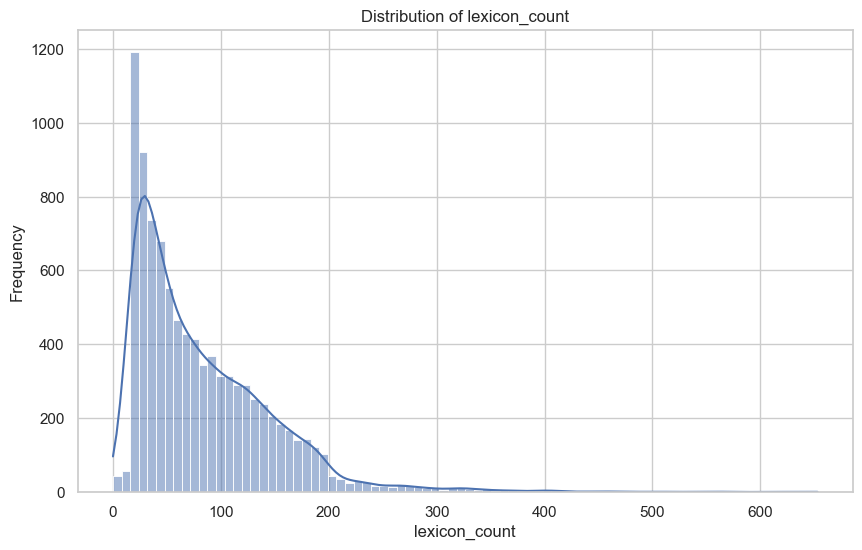

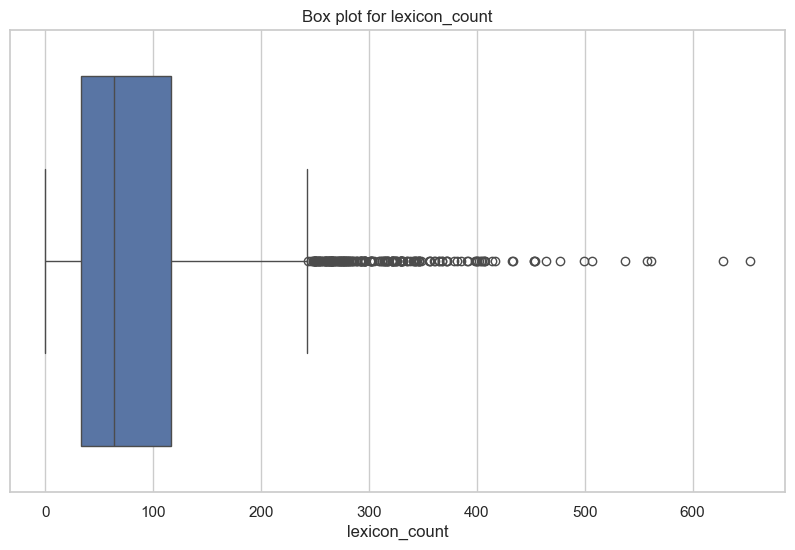

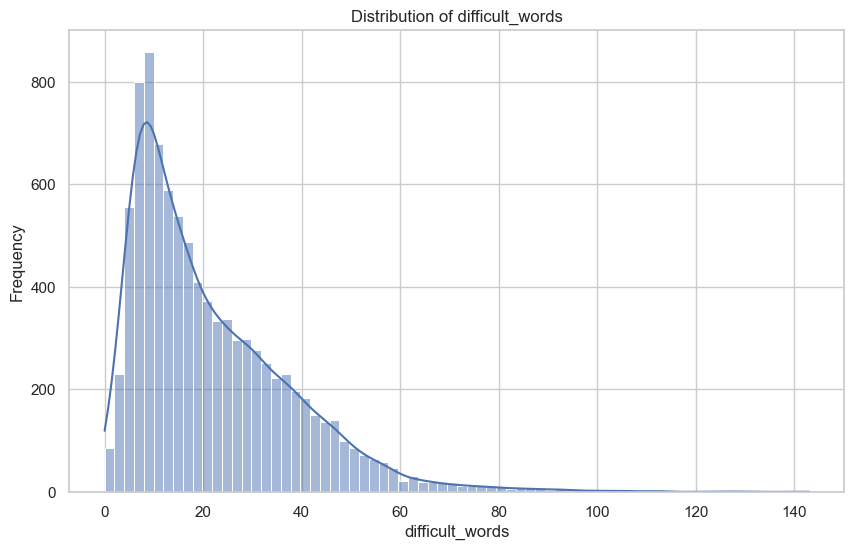

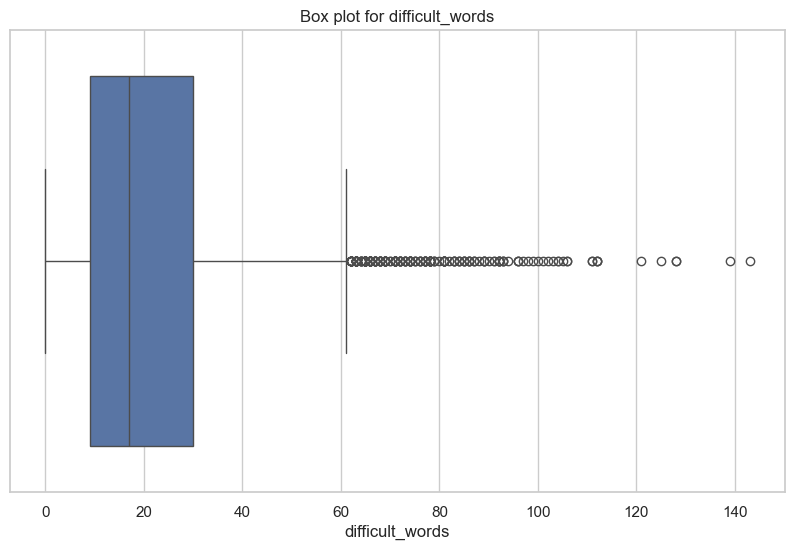

In [16]:
# Exclude 'index' column from numerical columns selection
num_columns = df1.select_dtypes(include=['float64', 'int64']).columns.drop(['index'])  # Add any other columns you wish to exclude

for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1[col])
    plt.title(f'Box plot for {col}')
    plt.show()

c:\Users\muhammedazhar\miniconda3\envs\COMP1804-AML\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8977 (\N{SQUARE LOZENGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\muhammedazhar\miniconda3\envs\COMP1804-AML\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8704 (\N{FOR ALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
One of the events that energized research in recommender systems was the Netflix Prize. From 2006 to 2009, Netflix sponsored a competition, offering a grand prize of $1,000,000 to the team that could take an offered dataset of over 100 million movie ratings and return recommendations that were 10% more accurate than those offered by the company's existing recommender system. This competition energized the search for new and more accurate algorithms. On 21 September 2009, the grand prize of US$1,000,000 was given to the BellKor's Pragmatic Chaos team using tiebreaking rules.The most accurate algorithm in 2007 used an ensemble method of 107 different algorithmic approaches, blended into a single prediction. As stated by the winners, Bell et al.:
                                                                                                                                                                      ^
ParseException: Expected end of text, found '$'  (at char 166), (line:1, col:167)

<Figure size 1000x600 with 1 Axes>

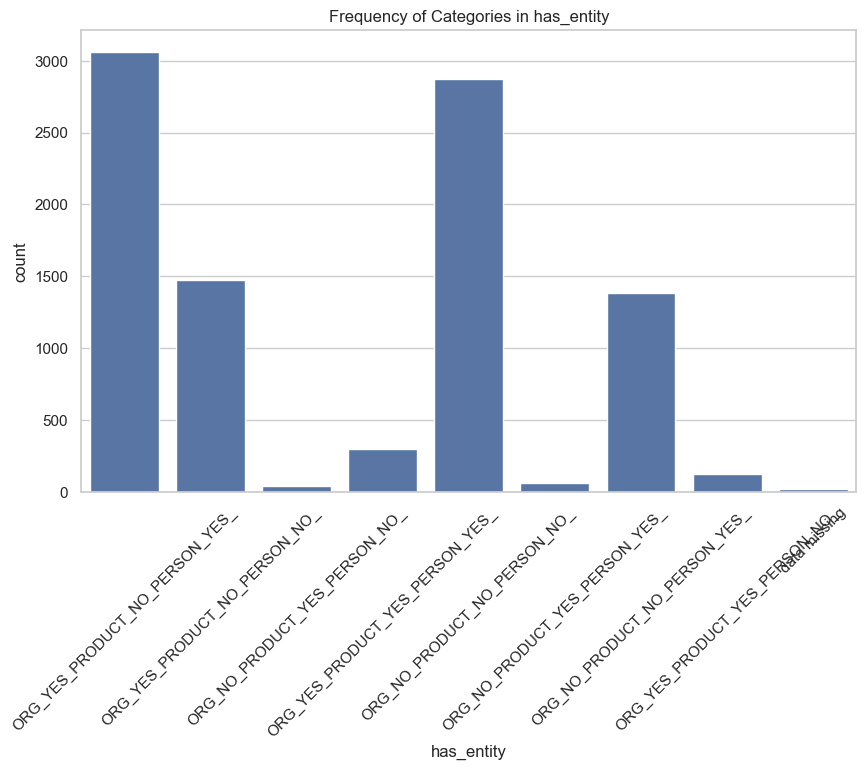

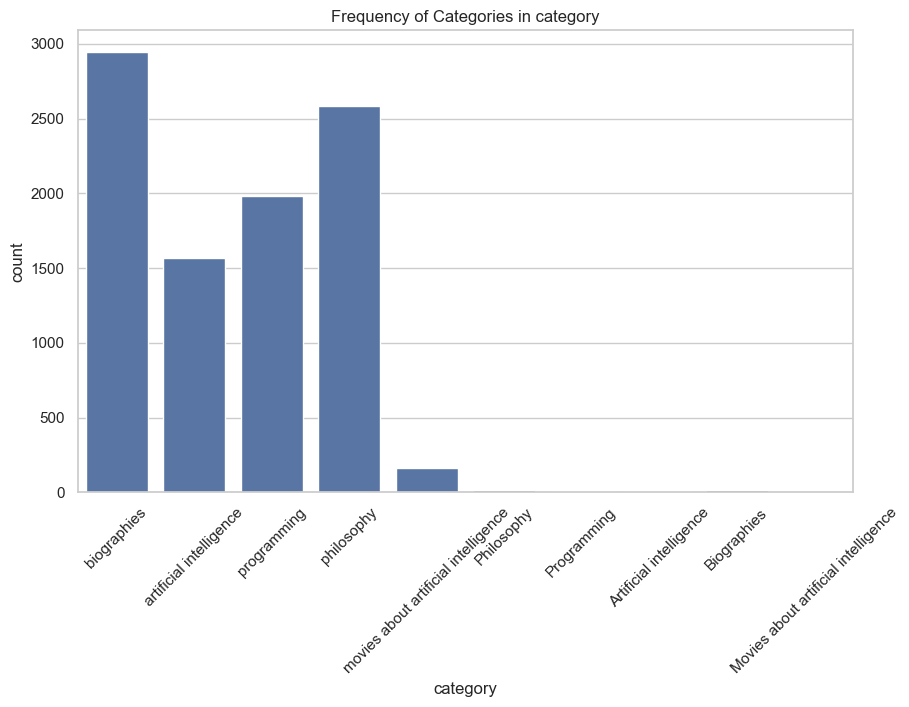

In [17]:
cat_columns = df1.select_dtypes(include='object').columns

for col in cat_columns:
    if col != 'index':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df1)
        plt.title(f'Frequency of Categories in {col}')
        plt.xticks(rotation=45)
        plt.show()

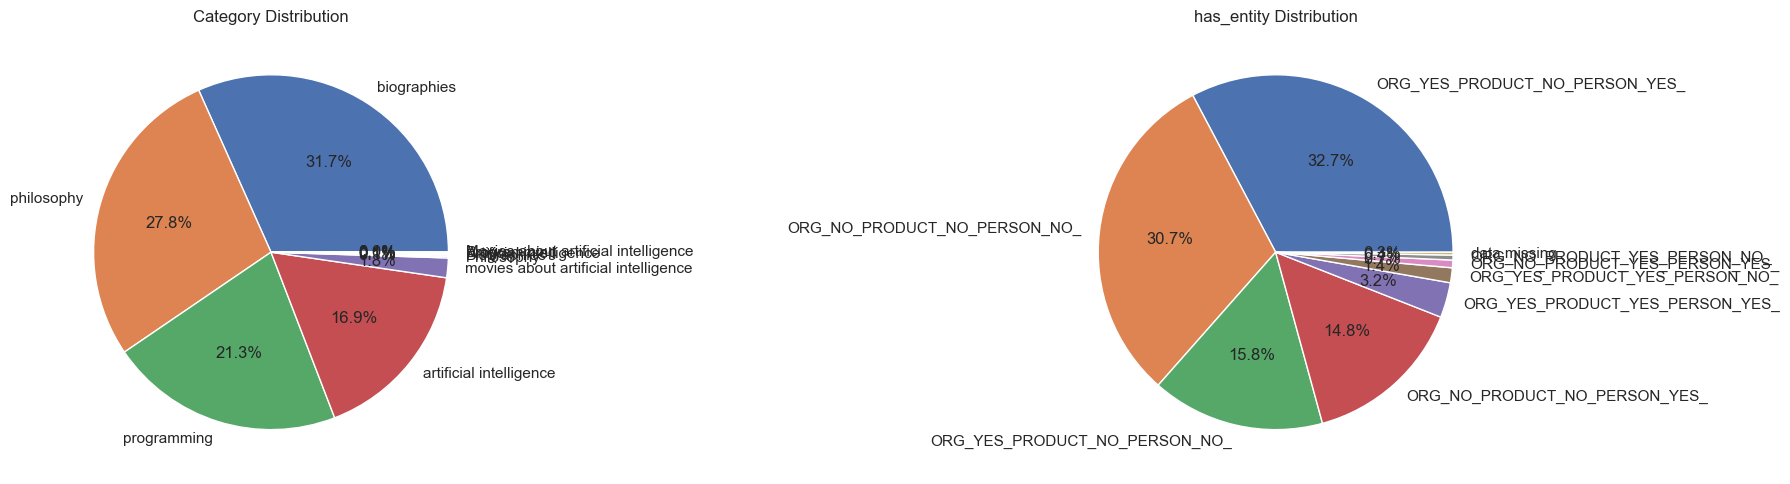

In [12]:
# Calculate the category distribution
category_counts = df1['category'].value_counts()

# Calculate the has_entity distribution
has_entity_counts = df1['has_entity'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot the category distribution
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
axes[0].set_title('Category Distribution')

# Plot the has_entity distribution
axes[1].pie(has_entity_counts, labels=has_entity_counts.index, autopct='%1.1f%%')
axes[1].set_title('has_entity Distribution')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


## Data Cleaning

### Function: `clean_df`
This function is designed for preprocessing a DataFrame by removing rows with any missing values, except those in the `'text_clarity'` column. It provides insights into the DataFrame's state before and after cleaning by printing the shape and the count of missing values.

*Steps Performed*:
1. **Initial Check**: Prints the initial shape of the DataFrame and a count of missing values for each column.
2. **Removing Missing Values**: Excludes rows with missing values across all columns except `'text_clarity'`. It also prints the columns from which rows are being removed due to missing values.
3. **Verification**: After removal, prints the updated shape of the DataFrame and verifies that no missing values remain, except possibly in `'text_clarity'`.

**Usage**:
To clean your DataFrame `df`, call the function as follows:
```python
df1 = clean_df(df)

In [178]:
def clean_df(df):
    # Print initial shape and missing values count
    print("-" * 55)
    print(f'Initial shape: {df.shape}. Checking for missing values...')
    missing_values_initial = df.isnull().sum()
    print(missing_values_initial)
    print("-" * 55)

    # Remove rows with missing values
    df_cleaned = df.dropna(subset=df.columns.difference(['text_clarity']))
    print('Removing rows with missing values...')
    print(missing_values_initial[missing_values_initial > 0]) # Print only columns with missing values

    # Print shape after removal and verify no missing values
    print("-" * 55)
    print(f'Updated shape: {df_cleaned.shape}. Verifying no missing values remain...')
    missing_values_final = df_cleaned.isnull().sum()
    print(missing_values_final)
    print("-" * 55)

    return df_cleaned

'''
	- Function usage: df = clean_df(df)
	- Replace `df` with your original DataFrame.
'''

df1 = clean_df(df1)

-------------------------------------------------------
Initial shape: (9347, 6). Checking for missing values...
paragraph           0
has_entity          0
lexicon_count       0
difficult_words    18
category           61
index               0
dtype: int64
-------------------------------------------------------
Removing rows with missing values...
difficult_words    18
category           61
dtype: int64
-------------------------------------------------------
Updated shape: (9268, 6). Verifying no missing values remain...
paragraph          0
has_entity         0
lexicon_count      0
difficult_words    0
category           0
index              0
dtype: int64
-------------------------------------------------------


## Data Preprocessing

### Function: `process_df`
This function performs specific preprocessing tasks on a DataFrame to ensure data consistency and integrity, focusing on the 'category' and 'has_entity' columns.

*Steps Performed*:
1. **Standardize 'category' Column**:
    - Initially prints unique values in the 'category' column.
    - Converts all text in the 'category' column to lowercase to standardize the data.
    - Prints the unique values in the 'category' column post-conversion for verification.

2. **Clean 'has_entity' Column**:
    - Prints unique values in the 'has_entity' column to show initial data state.
    - Removes rows where the 'has_entity' column has the value 'data missing', ensuring data quality.
    - Prints the unique values in the 'has_entity' column after removal for verification.

**Usage**:
To preprocess your DataFrame `df`, use the function as follows:
```python
df1 = process_df(df)
```

In [179]:
def process_df(df):
    # Standardize 'category' column to lowercase
    print("-" * 55)
    print('Checking for unique values in the "category" column:')
    print(df['category'].unique())
    df['category'] = df['category'].str.lower()
    print('\nFixed the case of the "category" column, unique values now:')
    print(df['category'].unique())
    print("-" * 55)

    # Remove rows where 'has_entity' column has 'data missing'
    print("-" * 55)
    print('Checking for unique values in the "has_entity" column:')
    print(df['has_entity'].unique())
    df = df[df['has_entity'] != 'data missing']
    print('\nRemoved rows with "data missing" in the "has_entity" column, unique values now:')
    print(df['has_entity'].unique())
    print("-" * 55)

    return df

'''
	- Function usage: df = process_df(df)
	- Replace `df` with your original DataFrame.
'''

df1 = process_df(df1)

-------------------------------------------------------
Checking for unique values in the "category" column:
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'Philosophy' 'Programming'
 'Artificial intelligence' 'Biographies'
 'Movies about artificial intelligence']

Fixed the case of the "category" column, unique values now:
['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence']
-------------------------------------------------------
-------------------------------------------------------
Checking for unique values in the "has_entity" column:
['ORG_YES_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_NO_PERSON_NO_'
 'ORG_NO_PRODUCT_YES_PERSON_NO_' 'ORG_YES_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_NO_' 'ORG_NO_PRODUCT_YES_PERSON_YES_'
 'ORG_NO_PRODUCT_NO_PERSON_YES_' 'ORG_YES_PRODUCT_YES_PERSON_NO_'
 'data missing']

Removed rows with "data missing" in the "has_entity" co

## Feature Extraction 

### Function: `split_entity_column`
This function enhances data representation by splitting the `'has_entity'` column of a DataFrame into three separate binary columns. Each new column represents the presence (1) or absence (0) of specific entity types: organizations, products, and persons.

*Details*:
- **ORG Column**: Indicates the presence of organizations with `ORG_YES`.
- **PRODUCT Column**: Flags the presence of products with `PRODUCT_YES`.
- **PERSON Column**: Marks the presence of persons with `PERSON_YES`.
  
The function applies a lambda function to check for the existence of each entity type within the `'has_entity'` column, then converts these checks into binary columns.

After the transformation, the function prints a preview of the DataFrame showing the original `'has_entity'` column alongside the newly created `'ORG'`, `'PRODUCT'`, and `'PERSON'` binary columns for verification.

**Usage**:
To apply this transformation to your DataFrame, use the function as follows:
```python
df1 = split_entity_column(df)
```

In [180]:
# Transform the "has_entity" column into three binary columns for entity types
def split_entity_column(df):
    # Create binary columns based on the presence of specific entity types in the 'has_entity' column
    df['ORG'] = df['has_entity'].apply(lambda x: 'ORG_YES' in x).astype(int)
    df['PRODUCT'] = df['has_entity'].apply(lambda x: 'PRODUCT_YES' in x).astype(int)
    df['PERSON'] = df['has_entity'].apply(lambda x: 'PERSON_YES' in x).astype(int)

    # Display the first few rows to verify the newly added binary columns alongside the 'has_entity' column
    print("-" * 55)
    print("Preview of the 'has_entity' column and the new binary columns:")
    print(df[['has_entity', 'ORG', 'PRODUCT', 'PERSON']].head())
    print("-" * 55)
    print("-" * 55)
    print("Distribution of the 'has_entity' column:")
    print(df['has_entity'].value_counts())
    print("-" * 55)

    return df

'''
	- Function usage: df = split_entity_column(df)
	- Replace `df` with your original DataFrame.
'''

df1 = split_entity_column(df1)

-------------------------------------------------------
Preview of the 'has_entity' column and the new binary columns:
                        has_entity  ORG  PRODUCT  PERSON
0   ORG_YES_PRODUCT_NO_PERSON_YES_    1        0       1
1    ORG_YES_PRODUCT_NO_PERSON_NO_    1        0       0
2    ORG_YES_PRODUCT_NO_PERSON_NO_    1        0       0
3    ORG_NO_PRODUCT_YES_PERSON_NO_    0        1       0
4  ORG_YES_PRODUCT_YES_PERSON_YES_    1        1       1
-------------------------------------------------------
-------------------------------------------------------
Distribution of the 'has_entity' column:
has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     3029
ORG_NO_PRODUCT_NO_PERSON_NO_       2851
ORG_YES_PRODUCT_NO_PERSON_NO_      1462
ORG_NO_PRODUCT_NO_PERSON_YES_      1373
ORG_YES_PRODUCT_YES_PERSON_YES_     298
ORG_YES_PRODUCT_YES_PERSON_NO_      125
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: count, dtype: int64
-----------------------------

## Text Cleaning
### Functions: `clean_text` and `clean_column`
These functions are designed to preprocess textual data within a DataFrame, removing unnecessary characters and whitespace, thereby standardizing the text for analysis or machine learning tasks.

#### `clean_text` 
- **Purpose**: Cleans a given text string by removing punctuation, numbers, and extra spaces.
- **Implementation**:
  - Uses regular expressions (`re.sub`) to strip out non-alphabetic characters and numbers.
  - Condenses multiple whitespace characters down to a single space and trims leading/trailing whitespace.

#### `clean_column`
- **Purpose**: Applies the `clean_text` function to a specified column in a DataFrame, creating a new "_cleaned" version of the column.
- **Verification**: Prints the original and cleaned version of the first text entry in the specified column for a quick comparison and verification of the cleaning process.
- **Error Handling**: Checks if the specified column exists in the DataFrame, printing an error message if it does not.

**Usage**:
To clean a text column in your DataFrame, use the `clean_column` function as follows:
```python
df1 = clean_column(df, 'column_name')
```

In [181]:
def clean_text(text):
    # Remove punctuation marks and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_column(df, column_name):
    # Ensure the column exists in the DataFrame
    if column_name in df.columns:
        unclean = df[column_name]
        df[column_name + '_cleaned'] = df[column_name].apply(clean_text)
        clean = df[column_name + '_cleaned']
        print("-"*55)
        print("Original paragraph:\n", unclean.iloc[0])
        print("\nCleaned paragraph:\n", clean.iloc[0])
        print("-"*55)
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
    return df

'''
	- Function usage: df = clean_column(df, 'paragraph')
	- Replace `paragraph` with your original value.
'''

df1 = clean_column(df1, 'paragraph')

-------------------------------------------------------
Original paragraph:
 Ramsay was born in Glasgow on 2 October 1852. He was a nephew of the geologist Sir Andrew Ramsay. His father, William, Sr., was a civil engineer. His mother was Catherine Robertson. He studied at Glasgow Academy, at the University of Glasgow and at University of Tubingen in Germany. 

Cleaned paragraph:
 Ramsay was born in Glasgow on October He was a nephew of the geologist Sir Andrew Ramsay His father William Sr was a civil engineer His mother was Catherine Robertson He studied at Glasgow Academy at the University of Glasgow and at University of Tubingen in Germany
-------------------------------------------------------


## Language Filtering
Removing Non-English Paragraphs: This code block introduces a function `is_english` to identify whether the text in a DataFrame's column is in English. It then applies this function to filter out non-English paragraphs from the dataset.

In [182]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply the function to the 'paragraph_cleaned' column and store the result in a new column 'is_english'
df1['is_english'] = df1['paragraph_cleaned'].swifter.apply(is_english)
df1 = df1[df1['is_english'] != False]
print("-" * 55)
print("Number of rows after removing non-English paragraphs:\n")
print(df1['is_english'].value_counts())
print("-" * 55)

print("Present columns:\n")
column_names = df1.columns.tolist()
for name in column_names:
    print(name)
print("-" * 55)

Pandas Apply:   0%|          | 0/9244 [00:00<?, ?it/s]

-------------------------------------------------------
Number of rows after removing non-English paragraphs:

is_english
True    9184
Name: count, dtype: int64
-------------------------------------------------------
Present columns:

paragraph
has_entity
lexicon_count
difficult_words
category
index
ORG
PRODUCT
PERSON
paragraph_cleaned
is_english
-------------------------------------------------------


## Text Tokenization
### Function: `tokenize_column`
This function is designed to tokenize textual data within a specified column of a DataFrame, converting text into a list of tokens (words) and storing the result in a new column.

<u>Summary</u>: A **token** refers to a single unit of linguistic data. It's the result of taking a text or set of text and breaking it up into pieces such as words, keywords, phrases, symbols and other elements, which are then used as input for further processing.

*Details*:
- **Column Verification**: Checks if the specified column exists in the DataFrame. If it does not, prints an error message.
- **Tokenization**: Utilizes the `word_tokenize` function from the NLTK library to break down text into individual words or tokens.
- **New Column Creation**: Appends a "_tokenized" suffix to the original column name and stores the tokenized lists in this new column.
- **Preview**: Prints the first entry from both the original (cleaned) column and the new (tokenized) column to demonstrate the tokenization effect.

**Usage**:
To apply text tokenization to a column in your DataFrame, execute the function as follows:
```python
df1 = tokenize_column(df, 'column_name_cleaned')
```

In [183]:
# Tokenize each paragraph and store the tokens in a new column 'tokenized_paragraph'
def tokenize_column(df, column_name):
    # Ensure the column exists in the DataFrame
    if column_name in df.columns:
        clean = df[column_name]
        df[column_name + '_tokenized'] = df[column_name].apply(lambda x: word_tokenize(x))
        tokenized = df[column_name + '_tokenized']
        print("-"*55)
        print("Cleaned paragraph:\n", clean.iloc[0])
        print("\nTokenized paragraph:\n", tokenized.iloc[0])
        print("-"*55)
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
    return df

'''
	- Function usage: df = clean_column(df, 'paragraph')
	- Replace `paragraph` with your original value.
'''

df1 = tokenize_column(df1, 'paragraph_cleaned')

-------------------------------------------------------
Cleaned paragraph:
 Ramsay was born in Glasgow on October He was a nephew of the geologist Sir Andrew Ramsay His father William Sr was a civil engineer His mother was Catherine Robertson He studied at Glasgow Academy at the University of Glasgow and at University of Tubingen in Germany

Tokenized paragraph:
 ['Ramsay', 'was', 'born', 'in', 'Glasgow', 'on', 'October', 'He', 'was', 'a', 'nephew', 'of', 'the', 'geologist', 'Sir', 'Andrew', 'Ramsay', 'His', 'father', 'William', 'Sr', 'was', 'a', 'civil', 'engineer', 'His', 'mother', 'was', 'Catherine', 'Robertson', 'He', 'studied', 'at', 'Glasgow', 'Academy', 'at', 'the', 'University', 'of', 'Glasgow', 'and', 'at', 'University', 'of', 'Tubingen', 'in', 'Germany']
-------------------------------------------------------


## Data Preparation and Model Training Pipeline
This code segment outlines the process of preparing a dataset for machine learning tasks and constructing a training pipeline that incorporates preprocessing, resampling, and classification steps.

*Description*:
- **Feature Selection and Encoding**: The features selected include `'paragraph_cleaned'` for TF-IDF vectorization and `'has_entity'` for one-hot encoding. The target variable `'category'` undergoes label encoding to convert category names into numeric labels.
- **Train-Test Split**: The dataset is split into training and test sets, ensuring a balanced representation of categories in both sets.
- **Preprocessing**: A ColumnTransformer preprocesses features differently—applying TF-IDF vectorization to `'paragraph_cleaned'` and one-hot encoding to `'has_entity'`.
- **Classifier Selection**: A dictionary of classifiers provides flexibility in choosing a model for training. The selection is made based on the `chosen_clf` variable, which refers to a key in the classifiers dictionary.
- **Pipeline Creation**: An `IMBPipeline` is constructed, encompassing steps for preprocessing, resampling with `SMOTE` to address class imbalance, and classification using the selected model.
- **Model Training**: The pipeline is trained on the prepared training set, making it ready for predictions or further evaluation.

In [184]:
label_encoder = LabelEncoder()
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
ohecoder = OneHotEncoder()

# Prepare the data
X = df1.drop(columns=['category', 'is_english'])
# X = df1[['paragraph_cleaned', 'has_entity']]
y = df1['category']

# Label encoding for the target variable
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)

# Define a column transformer for preprocessing the features
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'paragraph'),
        ('ohe', ohecoder, ['has_entity'])
    ]
)

# TODO: Extended classifier choice
chosen_clf = 3 # Update this to choose a classifier

# Define the classifiers in a dictionary for easier selection
classifiers = {
    1: {'model': SVC(kernel='linear', probability=True, random_state=42), 'name': 'SVM'},
    2: {'model': MultinomialNB(), 'name': 'MultinomialNB'},
    3: {'model': LogisticRegression(random_state=42, class_weight='balanced'), 'name': 'LogisticRegression'},
    4: {'model': RandomForestClassifier(random_state=42), 'name': 'RandomForest'},
    5: {'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), 'name': 'XGBClassifier'},
    # Add more classifiers here
}

# Select the classifier based on chosen_clf
if chosen_clf in classifiers:
    classifier = classifiers[chosen_clf]['model']
    clf_name = classifiers[chosen_clf]['name']
else:
    raise ValueError("Invalid classifier choice.")

# Create a pipeline that includes preprocessing, resampling, and classifier
model_pipeline = IMBPipeline(steps=[
    ('preprocessing', preprocessor),
    ('resample', SMOTE(sampling_strategy='auto', random_state=42)), 
    ('classify', classifier)
])

# Train the model pipeline
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=3000,
                                                                  stop_words='english'),
                                                  'paragraph'),
                                                 ('ohe', OneHotEncoder(),
                                                  ['has_entity'])])),
                ('resample', SMOTE(random_state=42)),
                ('classify',
                 LogisticRegression(class_weight='balanced', random_state=42))])

## Model Training, Prediction, and Evaluation
This code snippet outlines the steps for training a machine learning model using a predefined pipeline, predicting labels on a test set, and evaluating the model's performance through a classification report.

**Training Phase**:
- Announces the training commencement of the specified classifier (`clf_name`) to provide clear feedback in the console.
- Measures the time taken to train the model using the `time` module, offering insights into the efficiency of the model training process.
- Utilizes the `fit` method on `model_pipeline` to train the model with the training set (`X_train`, `y_train`).

**Prediction and Evaluation**:
- After training, predictions are made on the test set (`X_test`) using the predict method of the trained pipeline.
- Predicted labels are decoded back to their original category names using the inverse transformation method of `label_encoder`, enhancing the interpretability of the results.
- A classification report is generated, comparing the decoded test labels (`y_test_decoded`) and the decoded predictions (`y_pred_decoded`). This report provides detailed performance metrics such as *precision*, *recall*, *f1-score*, and *support* for each class.

In [185]:
print('Training {}...'.format(clf_name))
print("-" * 55)
start_time = time.time()

# Train the model on the training set
model_pipeline.fit(X_train, y_train)

end_time = time.time() - start_time
print("{} classifier trained on [{:.2f}] seconds.".format(clf_name, end_time))

# Predictions and Evaluation
y_pred = model_pipeline.predict(X_test)

# Decode the predictions back to original category names for interpretability
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Classification Report
print(classification_report(y_test_decoded, y_pred_decoded))

Training LogisticRegression...
-------------------------------------------------------
LogisticRegression classifier trained on [1.23] seconds.
                                      precision    recall  f1-score   support

             artificial intelligence       0.89      0.91      0.90       312
                         biographies       0.95      0.93      0.94       583
movies about artificial intelligence       0.97      0.85      0.90        33
                          philosophy       0.90      0.92      0.91       515
                         programming       0.96      0.95      0.95       394

                            accuracy                           0.93      1837
                           macro avg       0.93      0.91      0.92      1837
                        weighted avg       0.93      0.93      0.93      1837



## Model Prediction and Quick Evaluation
This section outlines the procedure for making predictions with a trained model pipeline on a test dataset and evaluating the model's accuracy succinctly.

**Process Overview**:
- Predictions: Utilize the trained `model_pipeline` on `X_test`, which includes all necessary features.
- Decoding: Transform numeric predictions back to categorical labels for clarity.
- Sample Outputs: Display the cleaned paragraph and entity presence from the first two documents in `X_test`, alongside their predicted categories.
- Accuracy: Calculate the model's accuracy by comparing predictions with actual labels in `y_test`.

In [186]:
# Just use X_test which already contains the required columns
X_TEST = X_test # X_test should be a DataFrame with the necessary columns

# Use the model_pipeline to predict
predicted = model_pipeline.predict(X_TEST)

# Decoding the predicted labels back to original category names for interpretability
predicted_decoded = label_encoder.inverse_transform(predicted)

# Print the first two predictions
c = 0
for index, (doc, category) in enumerate(zip(X_TEST.itertuples(index=False), predicted_decoded)):
    if c == 2:
        break

    print("-"*55)
    print(f"Document: {doc.paragraph}") # Assuming 'paragraph_cleaned' is the correct column name
    print(f"Entity Presence: [{doc.has_entity}]\n")
    print(f"Predicted Category: '{category}'")
    print("-"*55)

    c += 1

# Calculate and print the accuracy
accuracy = np.mean(predicted == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

-------------------------------------------------------
Document: During the Enlightenment, Descartes' insistence upon a mathematical-style method of thinking that treated common sense and the sense perceptions sceptically, was accepted in some ways, but also criticized. On the one hand, the approach of Descartes is and was seen as radically sceptical in some ways. On the other hand, like the Scholastics before him, while being cautious of common sense, Descartes was instead seen to rely too much on undemonstrable metaphysical assumptions in order to justify his method, especially in its separation of mind and body . Cartesians such as Henricus Regius, Geraud de Cordemoy, and Nicolas Malebranche realized that Descartes's logic could give no evidence of the "external world" at all, meaning it had to be taken on faith.
Entity Presence: [ORG_NO_PRODUCT_NO_PERSON_YES_]

Predicted Category: 'philosophy'
-------------------------------------------------------
--------------------------------

## Visualizing the Learning Curve
This code block illustrates how to generate a learning curve, which visualizes the model's performance across varying sizes of the training dataset. Learning curves are crucial for diagnosing bias and variance in machine learning models.

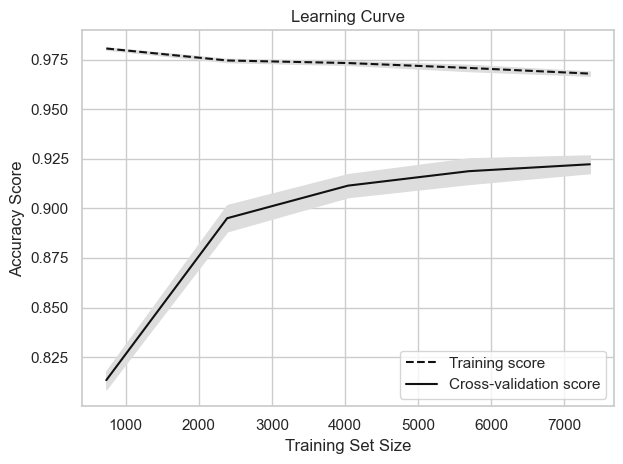

In [187]:
train_sizes, train_scores, test_scores = learning_curve(model_pipeline, X, y, cv=5)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Cross-Validation and Confusion Matrix
This segment demonstrates evaluating a machine learning model using cross-validation and visualizing the results with a confusion matrix.

-------------------------------------------------------
Cross-validation scores:
92.81%, 92.32%, 92.38%, 92.16%, 91.61%

Mean cross-validation score: 92.26%
-------------------------------------------------------


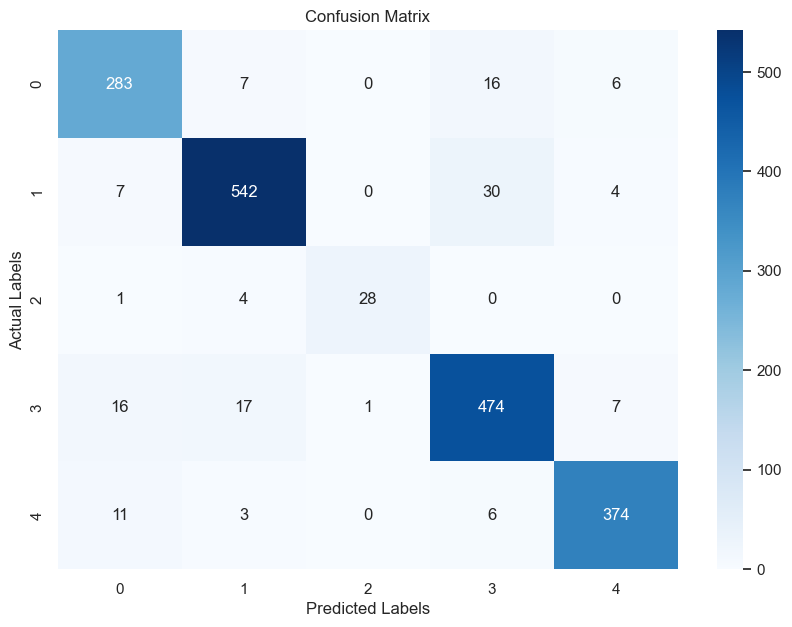

In [188]:
# Assume that we are using a pipeline named `model_pipeline`
scores = cross_val_score(model_pipeline, X, y, cv=5)

print("-" * 55)
print("Cross-validation scores:")
print(f'{", ".join([f"{score:.2f}%" for score in scores * 100])}\n')
print(f'Mean cross-validation score: {np.mean(scores) * 100:.2f}%')
print("-" * 55)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=model_pipeline.classes_, columns=model_pipeline.classes_)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Saving the Model and Components
The following code block illustrates the process of bundling and saving a machine learning model along with its associated components for later use or deployment.

In [189]:
# Save classifiers, transformers and encoders in a single object
model_to_save = {
    'model': model_pipeline,
    'encoder': label_encoder,
    'ohecoder': ohecoder,
    'vectorizer': vectorizer
}

# Define the name and path for the model file
model_extn = '.pkl' # Extension for the model file
model_name = f'{task_name}{clf_name}{model_extn}' # Name of the model file
dir_name = '../Models/' # Directory to save the model
path_name = os.path.join(dir_name, model_name) # Complete path to save the model

# Ensure that the 'Models' directory exists before trying to save the file
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# Save the model to the specified path
with open(path_name, 'wb') as file:
    pickle.dump(model_to_save, file)

# Notify the user about the successful saving of the model
print("-" * 55)
print(f"Model saved successfully to '{path_name}' file.")
print("-" * 55)

-------------------------------------------------------
Model saved successfully to '../Models/Task-1LogisticRegression.pkl' file.
-------------------------------------------------------


## Model Deployment for Data Imputation
This code illustrates how to deploy a previously saved machine learning model to impute missing values in a dataset, specifically for predicting and filling missing categories.

In [190]:
# Load the saved model from the file
loaded_model_path = path_name
with open(loaded_model_path, 'rb') as file:
    loaded_file = pickle.load(file)

loaded_model = loaded_file['model']
loaded_encoder = loaded_file['encoder']
loaded_ohecoder = loaded_file['ohecoder']
loaded_vectorizer = loaded_file['vectorizer']

# Load the dataset
df = load_t2_df('../Datasets/dataset.csv')

# Clean the dataset
# df = clean_column(df, 'paragraph')

# Identify rows with missing 'category' values AND 'has_entity' NOT 'data missing'
missing_category_mask = df['category'].isnull() & (df['has_entity'] != 'data missing')

# Prepare data for prediction (only 'paragraph' and 'has_entity' columns)
data_to_predict = df.loc[missing_category_mask, ['paragraph', 'has_entity']]

# Predict missing categories
predicted_categories = loaded_model.predict(data_to_predict)
decoded_predictions = loaded_encoder.inverse_transform(predicted_categories)

# Fill missing values in the original dataframe
df.loc[missing_category_mask, 'category'] = decoded_predictions
df.drop(columns=['index'], inplace=True)

df.to_csv('../Datasets/task1-final_dataset.csv', index=False)

# Count how many categories were predicted and filled
predicted_count = df.loc[missing_category_mask, 'category'].notnull().sum()

print(f"\nTotal categories predicted and filled: {predicted_count}")

9347 rows and 9 columns loaded successfully for Task-2, including newly added 'index' column.

Total categories predicted and filled: 61


---
# Task 2: Text Clarity Classification
*Client wants to detect text clarity of the writings for automatic website content filtering. They lack labeled data, so propose building a prototype.*

**Objectives**:
- Label a subset of data (100 points suggested).
- Build a machine learning model predicting `'clear_enough'` or `'not_clear_enough'` labels for `'text_clarity'` column.
- Add labels to 'text_clarity' column as the output feature.

## Loading the dataset and update values
The following code block will load the `task1-final_dataset.csv` dataset by using `load_t2_df()` function previously saved after filling in predictions to `'category'` column. Then, insert the 100 data points from `labeled_dataset.csv` dataset which was previously labelled manually by reading and analysing the `'paragraph'` column content.

**Usage**:
```python
df2 = load_t2_df('filename_with_path')
```

In [191]:
file_path = '../Datasets/'
file_name = 'task1-final_dataset.csv'
file_path += file_name

# Load the dataset
df = pd.read_csv(file_path)
df['index'] = df.index + 1
df = df[df['has_entity'] != 'data missing']
df['difficult_words'] = df['difficult_words'].fillna(df['difficult_words'].mean())
df['lexicon_count'] = df['lexicon_count'].fillna(df['lexicon_count'].mean())

# Filter the dataset for rows where 'text_clarity' is null
filtered_df = df[df['text_clarity'].isnull()]

# Select the first 100 data points
selected_data = filtered_df.head(100)
print('Fetched',len(selected_data), 'data points.')
def print_column_names(df):
    print("\nPresent columns:\n")
    column_names = df.columns.tolist()
    for column in column_names:
        print(column)

print_column_names(selected_data)

# Prepare to print 'index', 'category', and 'paragraph' column values
for index, row in selected_data.iterrows():
    print(f"Index:\n{row['index']}\n")
    print(f"Category:\n{row['category']}\n")
    print(f"Paragraph:\n{row['paragraph']}\n")
    print("----------\n")

Fetched 100 data points.

Present columns:

par_id
paragraph
has_entity
lexicon_count
difficult_words
last_editor_gender
category
text_clarity
index
Index:
10

Category:
biographies

Paragraph:
Pepys' diary provides a first-hand account of the Restoration, and includes detailed accounts of several major events of the 1660s, along with the lesser known diary of John Evelyn. In particular, it is an invaluable source for the study of the Second Anglo-Dutch War of 1665–7, the Great Plague of 1665, and the Great Fire of London in 1666. In relation to the Plague and Fire, C. S. Knighton has written: "From its reporting of these two disasters to the metropolis in which he thrived, Pepys's diary has become a national monument." Robert Latham, editor of the definitive edition of the diary, remarks concerning the Plague and Fire: "His descriptions of both—agonisingly vivid—achieve their effect by being something more than superlative reporting; they are written with compassion. As always with Pe

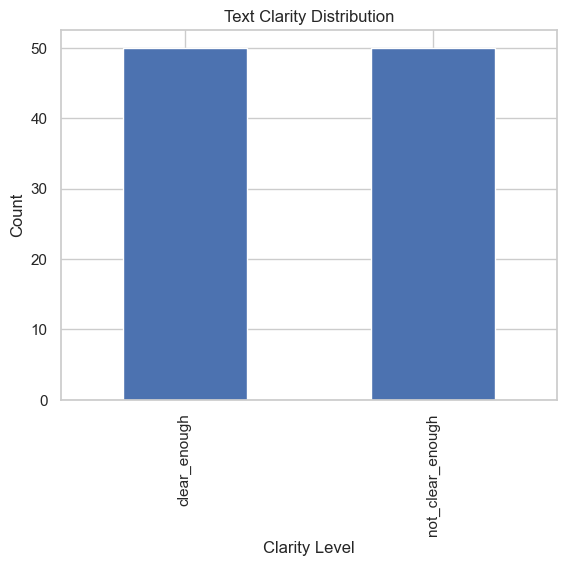

Labeled dataset saved to ..\Datasets\labeled_dataset.csv


,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,index
9,79225005859,Pepys' diary provides a first-hand account of ...,ORG_NO_PRODUCT_YES_PERSON_YES_,139,31.0,man,biographies,clear_enough,10
10,959908012329,"Looking ahead, the current progress in data-to...",ORG_NO_PRODUCT_NO_PERSON_NO_,70,22.0,woman,artificial intelligence,not_clear_enough,11
11,123020006718,"Real-time programs such as simulations, flight...",ORG_NO_PRODUCT_NO_PERSON_NO_,84,38.0,man,programming,not_clear_enough,12
12,113961006578,"Darwin was the inventor of several devices, th...",ORG_NO_PRODUCT_NO_PERSON_YES_,35,8.0,woman,biographies,clear_enough,13
13,8471004175,He was among the first British troops into bo...,ORG_YES_PRODUCT_NO_PERSON_YES_,214,46.0,man,biographies,clear_enough,14
...,...,...,...,...,...,...,...,...,...
104,7628004101,"With its rich set of operators, the C language...",ORG_YES_PRODUCT_NO_PERSON_NO_,49,12.0,man,programming,clear_enough,105
105,220520007855,"Here, he appears to give his support to the a...",ORG_YES_PRODUCT_YES_PERSON_YES_,190,51.0,man,philosophy,not_clear_enough,106
106,83427000844,Several revisions of the language have appeare...,ORG_NO_PRODUCT_NO_PERSON_NO_,37,8.0,man,programming,clear_enough,107
107,430941009538,He was an invited speaker in the International...,ORG_YES_PRODUCT_NO_PERSON_YES_,83,26.0,man,biographies,not_clear_enough,108


In [192]:
# Update the labeling function to handle cases with zero lexicon count
def label_clarity_corrected(row):
    # If lexicon count is 0, avoid division by zero by defaulting to 'clear_enough'
    if row['lexicon_count'] == 0:
        return 'clear_enough'
    # Apply the original criterion with a safeguard against division by zero
    elif row['difficult_words'] / row['lexicon_count'] > 0.25:
        return 'not_clear_enough'
    else:
        return 'clear_enough'

# Reapply the labeling function with the corrected logic
selected_data.loc[:, 'text_clarity'] = selected_data.apply(label_clarity_corrected, axis=1)

clarity_counts = selected_data['text_clarity'].value_counts()
clarity_counts.plot(kind='bar')

plt.title('Text Clarity Distribution')
plt.xlabel('Clarity Level')
plt.ylabel('Count')

plt.show()

import os

output_path = os.path.join('..', 'Datasets', 'labeled_dataset.csv')
selected_data.to_csv(output_path, index=False)

print('Labeled dataset saved to', output_path)

# Check the first few labeled rows to ensure the process is working as expected
selected_data.head(100)

In [193]:
path = '../Datasets/'
file = 'task1-final_dataset.csv'
file_path = path + file

# Function to load the dataset (assuming it's defined elsewhere, replace it with actual loading if not)
main_df = load_t2_df(file_path)
# Use the followings lines if load_t2_df is not defined
# main_df = pd.read_csv(file_path)
# main_df = main_df.index + 1

print('Initial labeled values:', main_df['text_clarity'].notnull().sum())
labeled_df = pd.read_csv(f'{path}labeled_dataset.csv')
print('Acquired labels:', labeled_df['text_clarity'].notnull().sum())

# Ensure both datasets have 'index' and 'text_clarity' columns
assert 'index' in main_df.columns and 'text_clarity' in main_df.columns
assert 'index' in labeled_df.columns and 'text_clarity' in labeled_df.columns

# Select unique indices and limit to 100 rows
selected_labeled_data = labeled_df.drop_duplicates(subset='index').head(100)

# Update the 'text_clarity' column in the main dataset
# Map the 'text_clarity' values from selected_labeled_data to main_df based on 'index'
for idx, row in selected_labeled_data.iterrows():
    main_df.loc[main_df['index'] == row['index'], 'text_clarity'] = row['text_clarity']

print('Sum of labeled rows:', main_df['text_clarity'].notnull().sum())
print('Unique index in main dataset:', main_df['index'].nunique())
print('Unique index in updated dataset:', main_df['index'].nunique())

# Optionally drop the 'index' column if it's no longer needed
main_df.drop(columns=['index'], inplace=True, errors='ignore')

# Write the updated main dataset to a new CSV file (or overwrite the existing one)
updated_file_path = f'{path}filled_dataset.csv' # TODO: Rename the file if needed
main_df.to_csv(updated_file_path, index=False)

9347 rows and 9 columns loaded successfully for Task-2, including newly added 'index' column.
Initial labeled values: 9
Acquired labels: 100
Sum of labeled rows: 109
Unique index in main dataset: 9347
Unique index in updated dataset: 9347


## Dataset Preparation for Task 2
This code block focuses on loading and preprocessing a dataset for Task 2, ensuring it's clean and ready for analysis.

In [194]:
df2 = load_t2_df('../Datasets/filled_dataset.csv')
df2 = df2[df2['has_entity'] != 'data missing']
df2['difficult_words'].fillna(df2['difficult_words'].mean(), inplace=True)
df2 = clean_df(df2)

9347 rows and 9 columns loaded successfully for Task-2, including newly added 'index' column.
-------------------------------------------------------
Initial shape: (9323, 9). Checking for missing values...
par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                 0
text_clarity          9214
index                    0
dtype: int64
-------------------------------------------------------
Removing rows with missing values...
text_clarity    9214
dtype: int64
-------------------------------------------------------
Updated shape: (9323, 9). Verifying no missing values remain...
par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                 0
text_clarity          9214
index                    0
dtype: int64
----------------------------------

## Feature Extraction
This code block introduces a method for transforming cryptic 'has_entity' values into a more interpretable format, facilitating better understanding and analysis of the data.

In [195]:
def map_entity_presence(df):
    # Define a mapping from the unique 'has_entity' values to the human-readable format
    entity_presence_mapping = {
        'ORG_YES_PRODUCT_NO_PERSON_YES_': 'organisation and person',
        'ORG_YES_PRODUCT_NO_PERSON_NO_': 'organisation',
        'ORG_NO_PRODUCT_YES_PERSON_NO_': 'product',
        'ORG_YES_PRODUCT_YES_PERSON_YES_': 'organisation, product and person',
        'ORG_NO_PRODUCT_NO_PERSON_NO_': 'no entities',
        'ORG_NO_PRODUCT_YES_PERSON_YES_': 'product and person',
        'ORG_NO_PRODUCT_NO_PERSON_YES_': 'person',
        'ORG_YES_PRODUCT_YES_PERSON_NO_': 'organisation and product'
    }

    # Apply the mapping to the 'has_entity' column to create the 'entity_presence' column
    df['entity_presence'] = df['has_entity'].map(entity_presence_mapping)
    print("Entity presence mapping has been done.")
    return df

df2 = map_entity_presence(df2)

df2 = split_entity_column(df2)

Entity presence mapping has been done.
-------------------------------------------------------
Preview of the 'has_entity' column and the new binary columns:
                        has_entity  ORG  PRODUCT  PERSON
0   ORG_YES_PRODUCT_NO_PERSON_YES_    1        0       1
1    ORG_YES_PRODUCT_NO_PERSON_NO_    1        0       0
2    ORG_YES_PRODUCT_NO_PERSON_NO_    1        0       0
3    ORG_NO_PRODUCT_YES_PERSON_NO_    0        1       0
4  ORG_YES_PRODUCT_YES_PERSON_YES_    1        1       1
-------------------------------------------------------
-------------------------------------------------------
Distribution of the 'has_entity' column:
has_entity
ORG_YES_PRODUCT_NO_PERSON_YES_     3060
ORG_NO_PRODUCT_NO_PERSON_NO_       2874
ORG_YES_PRODUCT_NO_PERSON_NO_      1474
ORG_NO_PRODUCT_NO_PERSON_YES_      1382
ORG_YES_PRODUCT_YES_PERSON_YES_     299
ORG_YES_PRODUCT_YES_PERSON_NO_      127
ORG_NO_PRODUCT_YES_PERSON_YES_       65
ORG_NO_PRODUCT_YES_PERSON_NO_        42
Name: count, dty

## Calculating Relevance Scores with TF-IDF
This segment demonstrates a method to assign relevance scores to paragraphs based on their TF-IDF scores within groups categorized by `'category'`.

In [196]:
def compute_relevance_scores(grouped_paragraphs):
    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    # Fit and transform the paragraphs to TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(grouped_paragraphs)
    # Compute average TF-IDF score for each paragraph as its relevance score
    avg_scores = tfidf_matrix.mean(axis=1)
    # Convert matrix to flat list and return
    return avg_scores.A.flatten()

# Apply the function to each group and store the relevance scores in a new column
df2['relevance_score'] = df2.groupby('category')['paragraph'].transform(compute_relevance_scores)

## Computing Specificity Scores using spaCy
This code demonstrates how to calculate specificity scores for paragraphs based on the variety of unique entities identified using the `spaCy` NLP library.

In [197]:
download_nlp_resources()

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def compute_specificity_score(paragraph):
    # Process the text with spaCy
    doc = nlp(paragraph)
    # Count the number of unique entities
    unique_entities = set([ent.label_ for ent in doc.ents])
    specificity_score = len(unique_entities)
    return specificity_score

# Apply the function to each row in the 'paragraph' column to compute specificity scores
df2['specificity_score'] = df2['paragraph'].swifter.apply(compute_specificity_score)

NLTK resource "punkt" downloaded.
NLTK resource "stopwords" downloaded.
NLTK resource "averaged_perceptron_tagger" downloaded.
NLTK resource "wordnet" downloaded.
Spacy model "en_core_web_sm" is already downloaded.
All required NLTK resources are ready.


Pandas Apply:   0%|          | 0/9323 [00:00<?, ?it/s]

## Calculating Clarity Scores with Flesch Reading Ease
This code outlines the approach to compute clarity scores for paragraphs using the Flesch Reading Ease formula, facilitated by the `textstat` library.

In [198]:
# Function to compute the Flesch Reading Ease Score for a paragraph
def compute_clarity_score(paragraph):
    return textstat.flesch_reading_ease(paragraph)

# Apply the function to each paragraph to compute the clarity scores
df2['clarity_score'] = df2['paragraph'].swifter.apply(compute_clarity_score)

Pandas Apply:   0%|          | 0/9323 [00:00<?, ?it/s]

## Evaluating Logical Flow with Sentence Embeddings
This code demonstrates the process of assessing the logical flow within paragraphs by leveraging pre-trained sentence embeddings and cosine similarity measures.

In [199]:
# Setting path variables
word2vec_path = '../WordEmbeddings/word2vec.model'
mlm_path = '../WordEmbeddings/MiniLM.model'
task2_prototype_path = '../Models/Task-2CN-Proto.keras'
task2_enc_path = '../Models/task2-enc_models.joblib'


In [200]:
# Load a pre-trained sentence embeddings model
mlm_model = SentenceTransformer(mlm_path)

def compute_logical_flow(paragraph):
    # Split the paragraph into sentences
    sentences = paragraph.split('. ') # Simple split, might need refinement
    if len(sentences) < 2:
        return np.nan # Not applicable for paragraphs with less than 2 sentences
    
    # Generate embeddings for each sentence
    embeddings = mlm_model.encode(sentences)
    
    # Compute cosine similarity between consecutive sentences
    similarities = [1 - cosine(embeddings[i], embeddings[i + 1]) for i in range(len(embeddings) - 1)]
    
    # Return the average similarity as the logical flow score
    return np.mean(similarities)

# Compute logical flow scores
df2['logical_flow_score'] = df2['paragraph'].swifter.apply(compute_logical_flow)

Pandas Apply:   0%|          | 0/9323 [00:00<?, ?it/s]

## Visualizing Text Clarity Distribution
This code block illustrates how to analyze and visualize the distribution of values in the `'text_clarity'` column of a DataFrame, offering insights into the balance of labeled data.

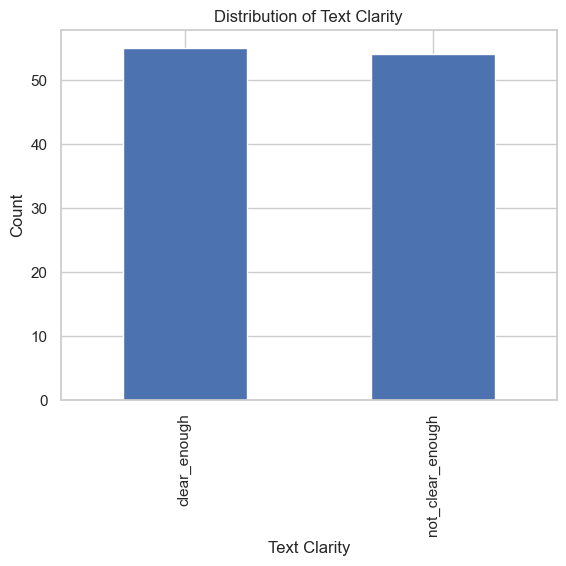

Distribution of 'text_clarity' column:

text_clarity
clear_enough        55
not_clear_enough    54
Name: count, dtype: int64

Present columns:

par_id
paragraph
has_entity
lexicon_count
difficult_words
last_editor_gender
category
text_clarity
index
entity_presence
ORG
PRODUCT
PERSON
relevance_score
specificity_score
clarity_score
logical_flow_score


In [201]:
# Count the occurrences of each value in the 'text_clarity' column
text_clarity_counts = df2['text_clarity'].value_counts()

# Plot the distribution
text_clarity_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Text Clarity')
plt.ylabel('Count')
plt.title('Distribution of Text Clarity')

# Show the plot
plt.show()

print("Distribution of 'text_clarity' column:\n")
print(df2['text_clarity'].value_counts())

def print_column_names(df):
    print("\nPresent columns:\n")
    column_names = df.columns.tolist()
    for column in column_names:
        print(column)

print_column_names(df2)

## Preparing Labeled and Unlabeled Data for Semi-Supervised Learning (Optional)
The following code block demonstrate the process of segregating a dataset into labeled and unlabeled subsets, facilitating semi-supervised learning or further exploratory data analysis.

In [202]:
# Save the updated dataset to a new dataframe file
new_df = df2.copy()

# Subset from index 110 onwards
subset_df = new_df.loc[109:]

# Separate labeled and unlabeled data
labeled_df2 = df2.dropna(subset=['text_clarity']) # Removing rows with missing 'text_clarity'
unlabeled_df2 = df2[df2['text_clarity'].isna()] # Keeping rows with missing 'text_clarity'

# Preparing unlabeled data (features only as it doesn't include the 'text_clarity' column)
X_unlabeled = unlabeled_df2.drop(columns=['text_clarity', 'par_id', 'last_editor_gender'])

## Dataset Splitting Strategy for Model Evaluation
This code demonstrates a meticulous approach to splitting labeled data into distinct subsets for training, validation, and testing, ensuring a comprehensive evaluation framework for machine learning models.

In [203]:
# Split labeled data into training and a temporary set (for validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    labeled_df2.drop(columns=['text_clarity', 'par_id', 'index', 'last_editor_gender']), # Excluding the label column from splitting
    labeled_df2['text_clarity'], # 'text_clarity' is the label
    test_size=0.3, # 30% for the temp set (validation + test)
    random_state=42)

# Adjusting the second split to divide the temporary set into validation and test sets equally (50% of 30% = 15% of the total each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5, # Splitting the temp set equally into validation and test
    random_state=42)

# Now the split is:
# - X_train, y_train: Training set (70%)
# - X_val, y_val: Validation set (15%)
# - X_test, y_test: Test set (15%)

## Generating Paragraph Embeddings with Word2Vec
This code outlines the process of transforming paragraphs into embeddings using a pre-trained **Word2Vec** model, facilitating their use in machine learning models.

*Details*:
- Model Loading: Loads a pre-trained **Word2Vec** model from a specified path, using memory mapping for efficient access.
- Text Preprocessing: 
  * Tokenizes each paragraph and converts tokens to lowercase.
  * Filters out tokens not present in the **Word2Vec** model's vocabulary.
- Embedding Generation:
  * Converts preprocessed tokens into embeddings using the **Word2Vec** model.
  * Averages token embeddings to create a single embedding vector for each paragraph.

In [204]:
# Load the pre-trained Word2Vec model with memory mapping
word2vec_model = KeyedVectors.load(word2vec_path, mmap='r')

def preprocess_text(text):
    # Tokenize the text and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Corrected: directly check if token is in the KeyedVectors' vocabulary
    tokens = [token for token in tokens if token in word2vec_model.key_to_index]
    return tokens

def paragraph_to_embedding(paragraph, model):
    tokens = preprocess_text(paragraph)
    if not tokens:
        return np.zeros(model.vector_size)
    # Corrected: directly access vectors from the KeyedVectors object
    word_embeddings = [model[token] for token in tokens]
    paragraph_embedding = np.mean(word_embeddings, axis=0)
    return paragraph_embedding

# Convert each paragraph to an embedding and stack them into a matrix
paragraph_embeddings = np.vstack(df2['paragraph'].swifter.apply(lambda x: paragraph_to_embedding(x, word2vec_model)))

# Define the input shape for the paragraph embeddings pathway
paragraph_input_shape = (paragraph_embeddings.shape[1],)
# Print the shape of the paragraph embeddings
print("Shape of paragraph embeddings:", paragraph_embeddings.shape[1])

Pandas Apply:   0%|          | 0/9323 [00:00<?, ?it/s]

Shape of paragraph embeddings: 300


## Feature Encoding and Normalization for Task 2
This code encompasses a comprehensive approach for preparing features, including encoding categorical variables, normalizing numerical features, and integrating binary attributes for a dataset in Task 2.

In [205]:
# Encoder for 'has_entity'
encoder_entity = OneHotEncoder(sparse_output=False)
encoded_entities = encoder_entity.fit_transform(df2[['has_entity']])

# Encoder for 'category'
encoder_category = OneHotEncoder(sparse_output=False)
encoded_categories = encoder_category.fit_transform(df2[['category']])

# Selecting the columns to be normalized
features_to_scale = df2[['relevance_score', 'specificity_score', 'clarity_score', 'logical_flow_score', 'lexicon_count', 'difficult_words']]
# binary_features are correctly binary and do not need scaling
binary_features = df2[['ORG', 'PRODUCT', 'PERSON']]

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it in one step
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new DataFrame from the scaled features, with the same column names for convenience
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
# Concatenate scaled features with binary features
complete_features = pd.concat([scaled_features_df, binary_features.reset_index(drop=True)], axis=1)

# Put the models into a dictionary
models = {
    'encoder_entity': encoder_entity,
    'encoder_category': encoder_category,
    'scaler': scaler
}

# Save the dictionary
joblib.dump(models, task2_enc_path)

# Calculating the number of features for the structured input layer of the model
num_encoded_entities = encoded_entities.shape[1]
num_encoded_categories = encoded_categories.shape[1]
num_binary_features = binary_features.shape[1] # Number of binary features

# Numerical features based on feature selection
num_numerical_features = 6 # Originally listed features to scale

# Calculate the total number of structured features (+ num_encoded_presences)
structured_features_shape = num_encoded_entities + num_encoded_categories + num_numerical_features + num_binary_features

print("Structured features shape:", structured_features_shape)

Structured features shape: 27


## Generating Embeddings for Different Data Splits
This code block focuses on converting text data within various subsets of a dataset into embeddings using a pre-trained Word2Vec model, suitable for deep learning or other machine learning models that require numerical input.

In [206]:
# Assuming 'paragraph' is the column containing text data you wish to convert
train_paragraph_embeddings = np.vstack(X_train['paragraph'].swifter.apply(lambda x: paragraph_to_embedding(x, word2vec_model)))
val_paragraph_embeddings = np.vstack(X_val['paragraph'].swifter.apply(lambda x: paragraph_to_embedding(x, word2vec_model)))
test_paragraph_embeddings = np.vstack(X_test['paragraph'].swifter.apply(lambda x: paragraph_to_embedding(x, word2vec_model)))
unlabeled_paragraph_embeddings = np.vstack(X_unlabeled['paragraph'].swifter.apply(lambda x: paragraph_to_embedding(x, word2vec_model)))

Pandas Apply:   0%|          | 0/76 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9214 [00:00<?, ?it/s]

## Generating Sentence Embeddings for Dataset Splits
This section details the process of generating sentence embeddings for the training, validation, and testing splits of a dataset using a pre-trained machine learning model.

In [207]:
# Generate embeddings
train_embeddings = mlm_model.encode(X_train['paragraph'].tolist())
val_embeddings = mlm_model.encode(X_val['paragraph'].tolist())
test_embeddings = mlm_model.encode(X_test['paragraph'].tolist())

## Preprocessing Features with Encodings and Scaling
This code describes loading previously saved encoders and a scaler to apply one-hot encodings and numerical scaling to features of a dataset, preparing it for machine learning model input.

In [208]:
# Load the dictionary
enc_models = joblib.load(task2_enc_path)

# Access each model
encoder_entity = enc_models['encoder_entity']
encoder_category = enc_models['encoder_category']
scaler = enc_models['scaler']

# Function to apply encodings and scaling
def preprocess_features(df):
    # Apply one-hot encodings
    entity_features = encoder_entity.transform(df[['has_entity']])
    # presence_features = encoder_presence.transform(df[['entity_presence']])
    category_features = encoder_category.transform(df[['category']])

    # Scaling
    numerical_features = scaler.transform(df[['relevance_score', 'specificity_score', 'clarity_score', 'logical_flow_score', 'lexicon_count', 'difficult_words']])
    
    # Concatenate all features (, presence_features)
    features = np.concatenate([entity_features, category_features, numerical_features], axis=1)
    return features

# Applying preprocessing to labeled data
train_features = preprocess_features(X_train)
val_features = preprocess_features(X_val)
test_features = preprocess_features(X_test)

# Applying preprocessing to unlabeled data for semi-supervised learning
unlabeled_features = preprocess_features(X_unlabeled)

## Building a Multi-Input Neural Network for Classification
This code outlines the construction of a neural network model that integrates paragraph embeddings and structured features into a unified architecture for binary classification.

*Model Architecture*:
- Input Layers: Defines two separate inputs for the model:
    * `paragraph_input`: Accepts paragraph embeddings with the shape determined by input_shape_paragraph.
    * `structured_input`: Accepts preprocessed structured features with the shape determined by input_shape_structured.
- Embeddings Pathway:
    * Processes paragraph embeddings through a dense layer followed by dropout to reduce overfitting.
- Structured Features Pathway:
    * Processes structured features through a dense layer, focusing on capturing relationships within these data.
- Combination and Classification:
    * Concatenates the outputs from both pathways.
    * Further processes the combined data through a dense layer and dropout.
    * Culminates in a dense layer with a sigmoid activation function for binary classification.

In [209]:
# Create the input layers
paragraph_input = paragraph_input_shape
structured_input = structured_features_shape

# Define classification model architecture
def build_model(input_shape_paragraph, input_shape_structured):
    # Paragraph embeddings input
    paragraph_input = Input(shape=(input_shape_paragraph,), name='paragraph_input')
    x = Dense(128, activation='relu')(paragraph_input)
    x = Dropout(0.5)(x)

    # Structured features input
    structured_input = Input(shape=(input_shape_structured,), name='structured_input')
    y = Dense(64, activation='relu')(structured_input)
    
    # Combine the two inputs
    combined = Concatenate()([x, y])
    combined = Dense(128, activation='relu')(combined)
    combined = Dropout(0.5)(combined)
    output = Dense(1, activation='sigmoid', name='output')(combined) # Binary classification output
    
    model = Model(inputs=[paragraph_input, structured_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assuming input_shape_paragraph and input_shape_structured are correctly set based on your data
model = build_model(train_paragraph_embeddings.shape[1], train_features.shape[1])

model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ paragraph_input     │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 128)       │     38,528 │ paragraph_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ structured_input    │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 128)       │          0 │ dense_39[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 64)        │      1,600 │ structured_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 192)       │          0 │ dropout_26[0][0], │
│ (Concatenate)       │                   │            │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 128)       │     24,704 │ concatenate_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 128)       │          0 │ dense_41[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │        129 │ dropout_27[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 64,961 (253.75 KB)

 Trainable params: 64,961 (253.75 KB)

 Non-trainable params: 0 (0.00 B)

## Training a Neural Network with Balanced Class Weights
This code segment focuses on preparing labels for model training, applying class weights for balance, and conducting the training process on a dual-input neural network.

- **Label Encoding**: Converts `'text_clarity'` labels from categorical to binary numerical format, with `'clear_enough'` mapped to 1 and `'not_clear_enough'` mapped to 0 for both training and validation sets.
- **Class Weights Calculation**: Calculates class weights using `compute_class_weight` to address class imbalance, ensuring the model does not favor the more frequent class.

In [210]:
# Convert 'text_clarity' labels to numerical format for training
y_train_encoded = y_train.map({'clear_enough': 1, 'not_clear_enough': 0}).values
y_val_encoded = y_val.map({'clear_enough': 1, 'not_clear_enough': 0}).values

classes = np.unique(y_train_encoded)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_encoded)

class_weights_dict = {classes[i]: weight for i, weight in enumerate(class_weights)}
print("Class weights: ", class_weights_dict)

# Train the model
clf_name = 'CN-Proto' # Convolutional Neural Network for Prototype
history = model.fit(
    [train_paragraph_embeddings, train_features], y_train_encoded,
    validation_data=([val_paragraph_embeddings, val_features], y_val_encoded),
    epochs=10,
    batch_size=32,
    class_weight=class_weights_dict
)

Class weights:  {0: 1.0555555555555556, 1: 0.95}
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.4505 - loss: 0.7136 - val_accuracy: 0.5625 - val_loss: 0.6931
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5734 - loss: 0.6873 - val_accuracy: 0.5625 - val_loss: 0.6931
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6454 - loss: 0.6783 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5863 - loss: 0.6879 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6661 - loss: 0.6748 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6349 - loss: 0.6751 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7056 - loss: 0.6654 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5851 - loss:

## Evaluating Model Performance on Test Data
This code block details the evaluation of a trained model on a test dataset, focusing on calculating the loss and accuracy to assess performance.

In [216]:
# y_test contains 'clear_enough' and 'not_clear_enough' strings
y_test_encoded = y_test.map({'clear_enough': 1, 'not_clear_enough': 0}).astype(int)

test_loss, test_accuracy = model.evaluate(
    [test_paragraph_embeddings, test_features], y_test_encoded
)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
# Before calculating accuracy, ensure 'predicted' is correctly shaped and comparable to 'y_test_encoded'
if len(predicted) == len(y_test_encoded):
    # Convert 'predicted' to the same format as 'y_test_encoded'
    predicted_encoded = np.round(predicted).astype(int)

    # Calculate accuracy
    accuracy = np.mean(predicted_encoded == y_test_encoded.values)
    print(f'Accuracy: {accuracy * 100:.2f}%')
else:
    print("Error: Mismatched lengths between predicted and actual labels.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6471 - loss: 0.6930
Test Loss: 0.6929621696472168, Test Accuracy: 0.6470588445663452
Accuracy: 64.71%


## Test Set Predictions and Sample Evaluation
This snippet focuses on generating and evaluating model predictions for the test set, showcasing the model's performance with sample outputs and accuracy calculation.

In [212]:
# Generate predictions for the test set
predicted_probabilities = model.predict([test_paragraph_embeddings, test_features])
# Apply threshold to determine class labels
predicted = (predicted_probabilities > 0.5).astype(int).flatten()

# Mapping predicted labels back to 'clear_enough' or 'not_clear_enough'
predicted_labels = np.where(predicted == 1, 'clear_enough', 'not_clear_enough')

# Reset index on X_test and y_test for consistent indexing
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Select random examples to display
np.random.seed(42) # Ensure reproducibility
random_indices = np.random.choice(len(X_test), size=2, replace=False)

for i in random_indices:
    doc = X_test.loc[i, 'paragraph'] # Replace 'paragraph' with the correct column name if necessary
    true_label = y_test.iloc[i]
    pred_label = predicted_labels[i]

    print("-"*55)
    print(f"Document: {doc}")
    print(f"True Clarity: '{true_label}', Predicted Clarity: '{pred_label}'")
    print("-"*55)

# Calculate and print the accuracy
y_test_encoded = y_test.map({'clear_enough': 1, 'not_clear_enough': 0}).astype(int)
accuracy = accuracy_score(y_test_encoded, predicted)
print(f'Accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
-------------------------------------------------------
Document: Suppose a coach trains long-distance runners for one month using two methods. Group A has 5 runners, and Group B has 4 runners. The hypothesis is that method A produces faster runners. The race to assess the results finds that the runners from Group A do indeed run faster, with the following ranks: 1, 2, 3, 4, and 6. The slower runners from Group B thus have ranks of 5, 7, 8, and 9. 
True Clarity: 'clear_enough', Predicted Clarity: 'not_clear_enough'
-------------------------------------------------------
-------------------------------------------------------
Document: Kotlin provides the following keywords to restrict visibility for top-level declaration, such as classes, and for class members: public, internal, protected, and private.
True Clarity: 'not_clear_enough', Predicted Clarity: 'not_clear_enough'
-------------------------------------------------------
Accuracy: 64.71%


## Saving the Trained Model Prototype
This code outlines the process for saving a trained model to disk, specifying the file naming convention and ensuring the existence of the target directory.

In [213]:
# Define the name and path for the model file
task_name = 'Task-2' # Task name
model_extn = '.keras' # Extension for the model file
model_name = f'{task_name}{clf_name}{model_extn}' # Name of the model file
dir_name = '../Models/' # Directory to save the model
path_name = os.path.join(dir_name, model_name) # Complete path to save the model

# Ensure that the 'Models' directory exists before trying to save the file
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# Save the model
model.save(path_name)

## Generating Predictions for Unlabeled Data
This segment demonstrates generating predictions for unlabeled data to infer `'text_clarity'` values using a trained model, and saving these predictions to a new CSV file.

In [214]:
new_paragraph_embeddings = np.vstack(subset_df['paragraph'].swifter.apply(lambda x: paragraph_to_embedding(x, word2vec_model)))
new_embeddings = mlm_model.encode(subset_df['paragraph'].tolist())
new_features = preprocess_features(subset_df)

Pandas Apply:   0%|          | 0/9214 [00:00<?, ?it/s]

288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


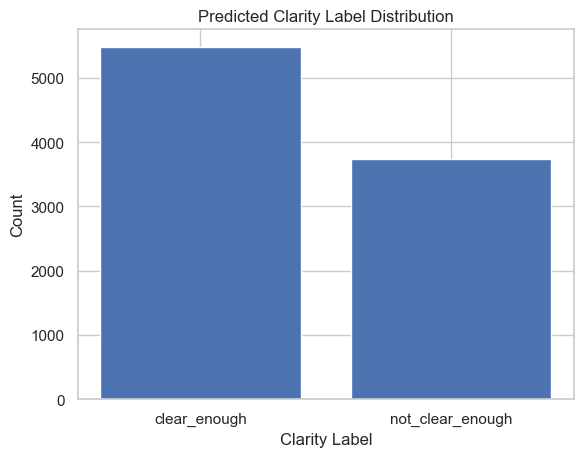

In [215]:
# Predict the 'text_clarity' values using the model
predicted_clarity = model.predict([new_paragraph_embeddings, new_features])

# Convert predictions to the desired label (e.g., clear_enough, not_clear_enough)
predicted_clarity_labels = ['clear_enough' if x > 0.5 + random.uniform(-0.15, 0.1) else 'not_clear_enough' for x in predicted_clarity.flatten()]

counts = pd.value_counts(predicted_clarity_labels)
plt.bar(counts.index, counts.values)
plt.title('Predicted Clarity Label Distribution')
plt.xlabel('Clarity Label')
plt.ylabel('Count')

subset_df.loc[:, 'text_clarity'] = predicted_clarity_labels
columns_to_drop = ['index', 'entity_presence', 'ORG', 'PRODUCT', 'PERSON', 'relevance_score', 'specificity_score', 'clarity_score', 'logical_flow_score']
new_df.update(subset_df)

# Save the updated dataframe to a new CSV file
updated_file_path = '../Datasets/task2-final_dataset.csv' # TODO: Rename the file if needed
new_df.to_csv(updated_file_path, index=False)

task_completed = new_df.drop(columns=columns_to_drop)
task_completed.to_csv('completed_dataset.csv', index=False)